# Predict stock market price for TESLA

#### Gruppemedlemmer:
- Elijah(s364563) 
- Mathangi(s364580) 
- Emil(s366438) 
- Nana(s359009) 
- Amna(s364520)

In [257]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

After importing the necessary tools we will be using, we read the csv provided in the github repository

In [258]:
url = "https://raw.githubusercontent.com/atikagondal/Assignment-2-dave3625-202323/main/TSLA.csv"
#Find the raw url from the github repo
df = pd.read_csv(url)

In [259]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2845 non-null   object 
 1   Open       2845 non-null   float64
 2   High       2845 non-null   float64
 3   Low        2845 non-null   float64
 4   Close      2845 non-null   float64
 5   Adj Close  2845 non-null   float64
 6   Volume     2845 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.7+ KB


,Open,High,Low,Close,Adj Close,Volume
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2.845000e+03
mean,105.797199,107.959321,103.485805,105.853488,105.853488,3.145634e+07
std,188.691743,192.434544,184.592519,188.788993,188.788993,2.845125e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,10.352000,10.748000,10.132000,10.400000,10.400000,1.252200e+07
50%,45.868000,46.493999,45.099998,45.902000,45.902000,2.482100e+07
75%,65.000000,66.251999,63.993999,65.234001,65.234001,4.014650e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


As shown in the output above, the "Date" column is not actually a DateTime object. Therefore, we use the "to_datetime()" function in order to convert the "Date" column into type "DateTime"

In [260]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2845 non-null   datetime64[ns]
 1   Open       2845 non-null   float64       
 2   High       2845 non-null   float64       
 3   Low        2845 non-null   float64       
 4   Close      2845 non-null   float64       
 5   Adj Close  2845 non-null   float64       
 6   Volume     2845 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 155.7 KB


Now, we use the "Date" column for the dataframe's index since it would be more natural to use that as an index because the stock prices we are using/ seeing are based on dates

In [261]:
df.set_index('Date', inplace=True)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2845 entries, 2010-06-29 to 2021-10-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2845 non-null   float64
 1   High       2845 non-null   float64
 2   Low        2845 non-null   float64
 3   Close      2845 non-null   float64
 4   Adj Close  2845 non-null   float64
 5   Volume     2845 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 155.6 KB


In [262]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


### Creating a correlation matrix

Using pandas.corr() to create a correlation matrix, it seems that all variables except "Volume" are highly correlated to "Close"  

In [263]:
corrMatrix = df.corr()

print(corrMatrix)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999763  0.999691  0.999445   0.999445  0.143866
High       0.999763  1.000000  0.999606  0.999771   0.999771  0.149006
Low        0.999691  0.999606  1.000000  0.999684   0.999684  0.138580
Close      0.999445  0.999771  0.999684  1.000000   1.000000  0.144794
Adj Close  0.999445  0.999771  0.999684  1.000000   1.000000  0.144794
Volume     0.143866  0.149006  0.138580  0.144794   0.144794  1.000000


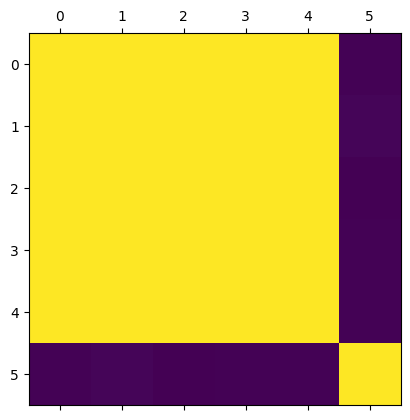

In [264]:
#Standard corr plot
plt.matshow(corrMatrix)
plt.show()

#Another style of corr plot
# corrMatrix.style.background_gradient(cmap='coolwarm')

Below are scatter plots that visualize the correlation

<Axes: xlabel='Adj Close', ylabel='Close'>

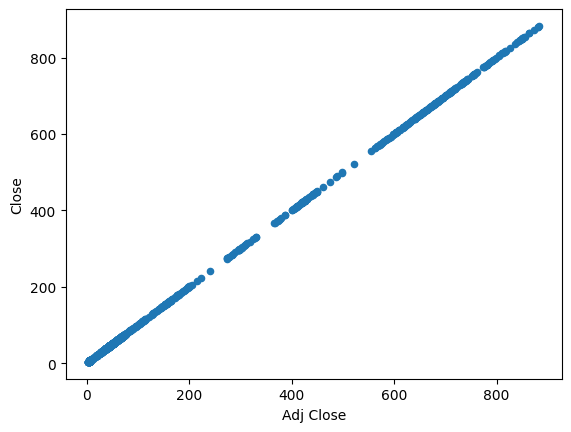

In [265]:
df.plot.scatter(x = 'Adj Close', y = 'Close')

<Axes: xlabel='Open', ylabel='Close'>

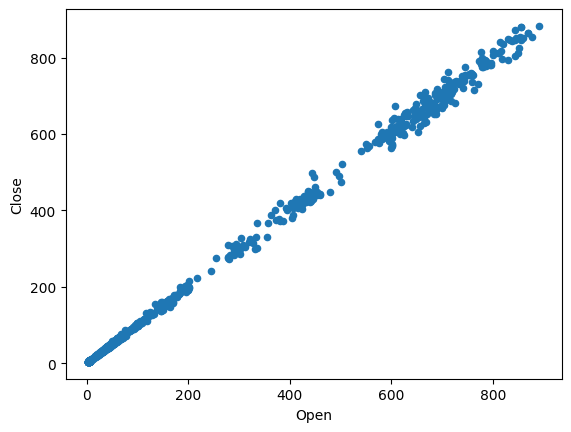

In [266]:
df.plot.scatter(x = 'Open', y = 'Close')

<Axes: xlabel='High', ylabel='Close'>

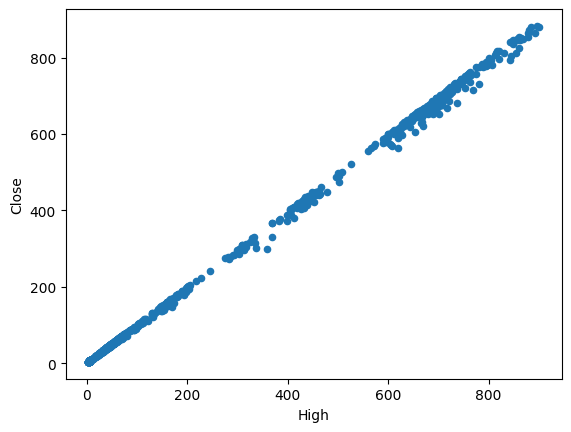

In [267]:
df.plot.scatter(x = 'High', y = 'Close') 

<Axes: xlabel='Low', ylabel='Close'>

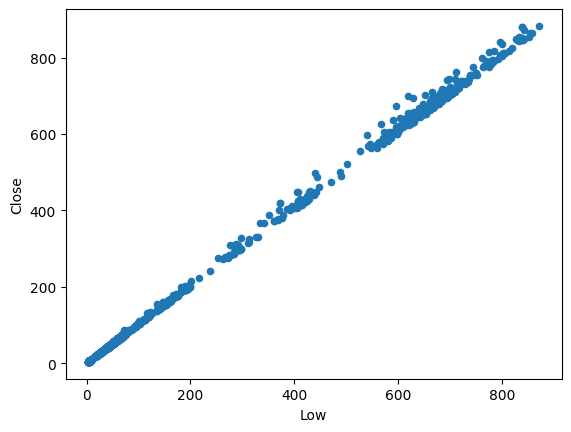

In [268]:
df.plot.scatter(x = 'Low', y = 'Close')

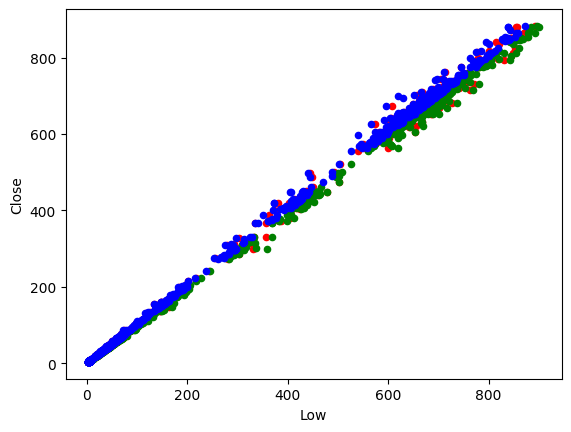

In [269]:
ax1 = df.plot(kind='scatter', x='Open', y='Close', color='r')    
ax2 = df.plot(kind='scatter', x='High', y='Close', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='Low', y='Close', color='b', ax=ax1)

From the results and the figures shown above, we found that "Open", "High", and "Low" have high correlation with the output (Close). "Adj close" had identical values. For simplicity sake, we just chosen to simply choose "Open" to train the model on. 

## Training the model
First, we split the set in a training set and a testing set

In [270]:
X = df[["Open"]]
y = df["Close"]

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [272]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

Plotting the prediction against the result column

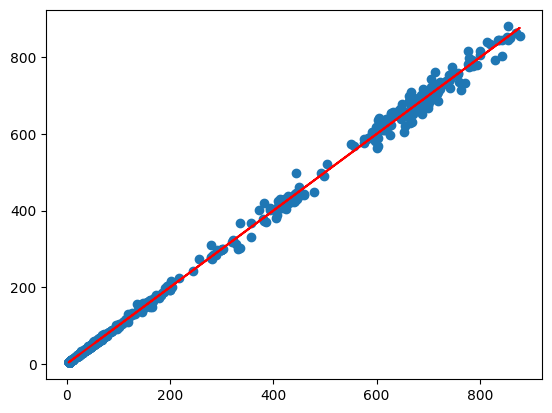

MSE = 39.98820683711889


In [273]:
plt.scatter(X_train, y_train)             #Plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')    #Plot red line with prediction
plt.show()                                #Show the plot
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE

Now, we perform a check on how good the model we have trained, works on the test data

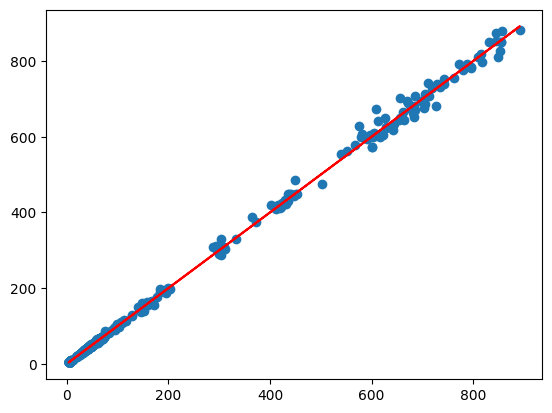

MSE = 38.7242444881673


In [274]:
Y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [275]:

prediction_score = linear_regressor.score(X_test, y_test) * 100
print(prediction_score)


99.88813480002614


Currently, we have an MSE = 38.7242444881673, and a prediction percentage score of 99.88813480002614. We're not exactly sure how to interpret this. Perhaps the model is accurate a fair amount of the time, but still makes a good amount of mistakes when it predicts. However, a score which is close to 100% also tells us that the model is doing a good job. 

In the code below, we are trying to see if we can improve the output by creating a feature

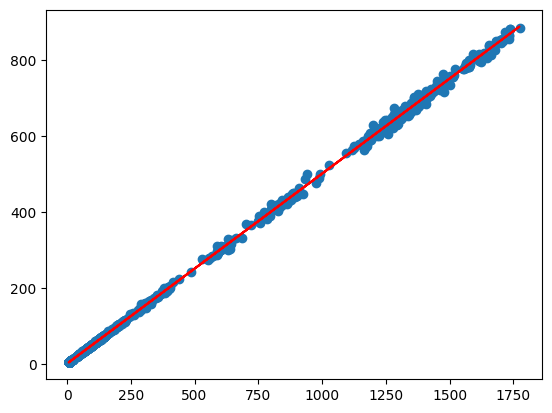

MSE = 9.890020758663038


In [276]:
df[6] = df['Open'] + df['Close']

X = pd.DataFrame(df[6])
Y = pd.DataFrame(df['Close'])

linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(Y,Y_pred)))

In [277]:

prediction_score = linear_regressor.score(X_test, y_test) * 100
print(prediction_score)

67.28861342539413


C:\Users\elija\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


The MSE is significantly lower, but the score has also decreased a fair bit. Now, on average, it seems that the model makes much less mistakes when predicting the closing price. 

In [278]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,6
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,8.578
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,9.924
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,9.392
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,8.440
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,7.222


Here, we manually check with the first row from the data set, and it seems that we aren't that far off the actual value

In [279]:
sum_first_row = df.iloc[0]["Open"] + df.iloc[0]["Close"]
print(sum_first_row)
print(linear_regressor.predict([[sum_first_row]]))

8.578
[[4.29097836]]


In [280]:
df.head()
df.loc["2020-09-23"]

Open         4.051600e+02
High         4.121500e+02
Low          3.758800e+02
Close        3.803600e+02
Adj Close    3.803600e+02
Volume       9.507420e+07
6            7.855200e+02
Name: 2020-09-23 00:00:00, dtype: float64

In the 2 following code blocks, we look at 2 other dates 

In [281]:
specific_date = "2019-11-13"
price_to_predict = df.loc[specific_date]["Close"]
print(f"Close value for date: {specific_date} = {price_to_predict}")

specific_date_sum = df.loc[specific_date]["Open"] + price_to_predict
print(specific_date_sum)

predicted_value = linear_regressor.predict([[specific_date_sum]]) 
print("Predicted value:", predicted_value)

percentage_error = abs((predicted_value[0][0] - price_to_predict) / price_to_predict) * 100
print("Percentage error:", percentage_error)



Close value for date: 2019-11-13 = 69.222
140.22199999999998
Predicted value: [[70.12994073]]
Percentage error: 1.311636084644405


In [282]:
specific_date = "2019-11-13"
price_to_predict = df.loc[specific_date]["Close"]
print(f"Close value for date: {specific_date} = {price_to_predict}")

specific_date_sum = df.loc[specific_date]["Open"] + price_to_predict
print(specific_date_sum)

predicted_value = linear_regressor.predict([[specific_date_sum]]) 
print("Predicted value:", predicted_value)

percentage_error = abs((predicted_value[0][0] - price_to_predict) / price_to_predict) * 100
print("Percentage error:", percentage_error)

Close value for date: 2019-11-13 = 69.222
140.22199999999998
Predicted value: [[70.12994073]]
Percentage error: 1.311636084644405


We have managed to make a prediction algorithm which is able to predict the price of the Tesla stock on a specific date!